In [1]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
df2 = pd.read_csv('/home/ishaan/Codes/Presentations/ai_hack_data/EEg_data/EEG_data.csv')

In [9]:
df2.head(10)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
5,0.0,0.0,44.0,66.0,73.0,1786446.0,176766.0,59352.0,26157.0,15054.0,33669.0,33782.0,31750.0,0.0,0.0
6,0.0,0.0,43.0,69.0,130.0,635191.0,122446.0,90107.0,65072.0,36230.0,53019.0,62938.0,59307.0,0.0,0.0
7,0.0,0.0,40.0,61.0,-2.0,161098.0,12119.0,1963.0,809.0,1277.0,3186.0,3266.0,2518.0,0.0,0.0
8,0.0,0.0,43.0,69.0,17.0,492796.0,120998.0,63697.0,68242.0,10769.0,88403.0,73756.0,22676.0,0.0,0.0
9,0.0,0.0,47.0,69.0,-59.0,82048.0,116131.0,47317.0,26197.0,41642.0,28866.0,32551.0,41810.0,0.0,0.0


In [13]:
df2.values[0][14]

0.0

In [14]:
x = df2[df2.columns[:14]]

In [16]:
y = df2[df2.columns[-1]]

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


## Feature Importance

[ 0.23414878  0.27874174  0.0639191   0.04333866  0.0349284   0.0446487
  0.03826598  0.03333678  0.03403453  0.0333241   0.04249956  0.04495981
  0.05030802  0.02354584]


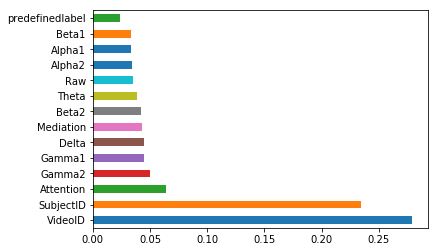

In [20]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [21]:
feat_importances

SubjectID          0.234149
VideoID            0.278742
Attention          0.063919
Mediation          0.043339
Raw                0.034928
Delta              0.044649
Theta              0.038266
Alpha1             0.033337
Alpha2             0.034035
Beta1              0.033324
Beta2              0.042500
Gamma1             0.044960
Gamma2             0.050308
predefinedlabel    0.023546
dtype: float64

In [23]:
# scale all values between 0 and 1 for training the neural net

for x in df2.columns[:14]:
    max = df2[x].max()
    df2[x] = df2[x].apply(lambda item : np.divide(item,max))
    
    

In [25]:
df2.head(6)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,0.56,0.43,0.135809,0.076164,0.030126,0.024625,0.023592,0.026172,0.027408,0.016846,0.006152,0.0,0.0
1,0.0,0.0,0.40,0.35,-0.024426,0.018611,0.009337,0.001050,0.002203,0.002572,0.002241,0.002683,0.002032,0.0,0.0
2,0.0,0.0,0.47,0.48,0.049340,0.191278,0.127583,0.147449,0.061074,0.033989,0.079335,0.029020,0.018807,0.0,0.0
3,0.0,0.0,0.47,0.57,-0.002443,0.507544,0.043005,0.044699,0.016800,0.010759,0.037962,0.025328,0.025170,0.0,0.0
4,0.0,0.0,0.44,0.53,-0.003908,0.253526,0.117803,0.027083,0.087403,0.042431,0.060535,0.022707,0.022067,0.0,0.0
5,0.0,0.0,0.44,0.66,0.035662,0.450592,0.058769,0.043324,0.025722,0.014098,0.020463,0.017126,0.023551,0.0,0.0


In [32]:
df2.shape[0]

12811

In [40]:
asc_order = []
for x in df2.columns:
    mean = df2[x].mean()
    #print(mean)
    asc_order.append((x,mean))
print(np.sort(asc_order,axis=0))

[['Alpha1' '0.010693413844614374']
 ['Alpha2' '0.015002515990411334']
 ['Attention' '0.02277474248372149']
 ['Beta1' '0.02318284242808462']
 ['Beta2' '0.030208547460443443']
 ['Delta' '0.03203261333832451']
 ['Gamma1' '0.03263149667448231']
 ['Gamma2' '0.05587222926222067']
 ['Mediation' '0.15279615486315043']
 ['Raw' '0.4131387089220245']
 ['SubjectID' '0.47182655530403633']
 ['Theta' '0.4799781437826868']
 ['VideoID' '0.4878446473950279']
 ['predefinedlabel' '0.4985992940094646']
 ['user-definedlabeln' '0.5126063539146046']]


In [41]:
from sklearn.model_selection import train_test_split

In [60]:
x = df2[df2.columns[:14]]
y = df2[df2.columns[-1]]

In [61]:
print(x.shape,y.shape)

(12811, 14) (12811,)


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [68]:
x_train.shape[1]

14

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.optimizers import SGD
from keras.layers import Dropout

model = Sequential()
#model.add(Flatten(input_shape = (IMAGE_HEIGHT,IMAGE_WIDTH)))
model.add(Dense(128,input_dim = x_train.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1920      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
__________

In [119]:
sgd = SGD(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['mse', 'mae', 'mape', 'cosine'])


In [120]:
model.fit(x_train, y_train, epochs = 60)

Epoch 1/60
8967/8967 [==============================] - 1s 77us/step - loss: 0.1871 - mean_squared_error: 0.1871 - mean_absolute_error: 0.3910 - mean_absolute_percentage_error: 195815365.9837 - cosine_proximity: -0.5114
Epoch 2/60
8967/8967 [==============================] - 1s 62us/step - loss: 0.1842 - mean_squared_error: 0.1842 - mean_absolute_error: 0.3865 - mean_absolute_percentage_error: 193982528.8297 - cosine_proximity: -0.5110
Epoch 3/60
8967/8967 [==============================] - 1s 56us/step - loss: 0.1826 - mean_squared_error: 0.1826 - mean_absolute_error: 0.3847 - mean_absolute_percentage_error: 192361809.4556 - cosine_proximity: -0.5110
Epoch 4/60
8967/8967 [==============================] - 1s 60us/step - loss: 0.1831 - mean_squared_error: 0.1831 - mean_absolute_error: 0.3842 - mean_absolute_percentage_error: 193060703.5967 - cosine_proximity: -0.5112
Epoch 5/60
8967/8967 [==============================] - 1s 68us/step - loss: 0.1797 - mean_squared_error: 0.1797 - mean_

8967/8967 [==============================] - 1s 64us/step - loss: 0.1289 - mean_squared_error: 0.1289 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 151549443.0101 - cosine_proximity: -0.5112
Epoch 39/60
8967/8967 [==============================] - 0s 54us/step - loss: 0.1270 - mean_squared_error: 0.1270 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 149826879.2087 - cosine_proximity: -0.5112
Epoch 40/60
8967/8967 [==============================] - 1s 57us/step - loss: 0.1253 - mean_squared_error: 0.1253 - mean_absolute_error: 0.2930 - mean_absolute_percentage_error: 148242666.6203 - cosine_proximity: -0.5114
Epoch 41/60
8967/8967 [==============================] - 1s 71us/step - loss: 0.1245 - mean_squared_error: 0.1245 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 147665844.2092 - cosine_proximity: -0.5110
Epoch 42/60
8967/8967 [==============================] - 1s 65us/step - loss: 0.1204 - mean_squared_error: 0.1204 - mean_absolut

In [121]:
y_pred = model.predict(x_test)

In [122]:
y_pred = y_pred[:,-1]

In [125]:
print(y_pred)

[ 0.58714175 -0.07762876  0.08353664 ...,  0.04662201  0.21907085
 -0.03961687]


In [127]:
print(y_test)

9051     1.0
2129     0.0
11184    0.0
1576     1.0
12262    1.0
1558     1.0
6146     1.0
12455    0.0
5227     0.0
4597     0.0
12578    1.0
5104     1.0
6580     0.0
11667    1.0
8380     1.0
8859     0.0
5869     0.0
8157     1.0
3744     0.0
1563     1.0
9381     0.0
6358     0.0
8977     0.0
7569     1.0
4293     0.0
8959     0.0
4357     0.0
4018     0.0
8787     1.0
1595     1.0
        ... 
3644     1.0
7048     0.0
8215     1.0
12430    0.0
485      0.0
3522     1.0
4450     1.0
11392    1.0
6354     0.0
1404     1.0
7458     0.0
11799    0.0
11847    0.0
11523    1.0
10731    0.0
5537     1.0
12275    1.0
6029     1.0
4599     0.0
12348    0.0
3718     0.0
4317     0.0
2974     0.0
2893     0.0
12574    1.0
2236     0.0
8902     0.0
8888     0.0
930      0.0
3461     0.0
Name: user-definedlabeln, Length: 3844, dtype: float64


In [115]:
y_pred.shape

(3844,)

In [116]:
y_test.shape

(3844,)

In [117]:
from keras.losses import mean_squared_error,categorical_hinge

In [118]:
error = mean_squared_error(y_test, y_pred)

In [102]:
error

<tf.Tensor 'Mean_1:0' shape=() dtype=float64>